<span style="display: none">
\setcounter{secnumdepth}{0}
    
\newcommand{\answerbox}[1][5]{
  \noindent\hskip -0.025\linewidth\framebox[1.05\linewidth]{\vbox to #1\baselineskip{}}

  \vspace{-#1\baselineskip}

\vspace{-\baselineskip}}
</span>

In [123]:
df_2017 = pd.read_csv("whr_data/whr_2017.csv")
print("df_2017:",len(df_2017),"rows and",len(df_2017.columns), "columns")
df_2018 = pd.read_csv("whr_data/whr_2018.csv")
print("df_2018:",len(df_2018),"rows and",len(df_2018.columns), "columns")
df_country = pd.read_csv("country_continent.csv")
print("df_country:",len(df_country),"rows and",len(df_country.columns), "columns")

df_2017: 155 rows and 11 columns
df_2018: 156 rows and 11 columns
df_country: 195 rows and 2 columns


In [124]:
df_2017 = pd.read_csv("whr_data/whr_2017.csv")
print(df_2017.info())
df_2018 = pd.read_csv("whr_data/whr_2018.csv")
print(df_2018.info())
df_country = pd.read_csv("country_continent.csv")
print(df_country.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     155 non-null    object 
 1   Happiness score                             155 non-null    float64
 2   Whisker-high                                155 non-null    float64
 3   Whisker-low                                 155 non-null    float64
 4   Explained by: GDP per capita                155 non-null    float64
 5   Explained by: Social support                155 non-null    float64
 6   Explained by: Healthy life expectancy       155 non-null    float64
 7   Explained by: Freedom to make life choices  155 non-null    float64
 8   Explained by: Generosity                    155 non-null    float64
 9   Explained by: Perceptions of corruption     155 non-null    float64
 10  Dystopia (1.85

In [125]:
df_2017 = pd.read_csv("whr_data/whr_2017.csv")
df_2018 = pd.read_csv("whr_data/whr_2018.csv")

df_2017tmp = pd.merge(df_2017, df_2018, on='Country', how='outer')
nan2018=df_2017tmp[df_2017tmp['Happiness score_x'].isnull()]
nulllist2018=[]
for x in nan2018['Country']:
    nulllist2018.append(x)

df_2018tmp = pd.merge(df_2018, df_2017, on='Country', how='outer')
nan2017=df_2018tmp[df_2018tmp['Happiness score_x'].isnull()]
nulllist2017=[]
for x in nan2017['Country']:
    nulllist2017.append(x)

print("Countries in WHR17 but not in WHR18: \n", nulllist2017)
print("Countries in WHR18 but not in WHR17: \n", nulllist2018)

Countries in WHR17 but not in WHR18: 
 ['Trinidad and Tobago', 'North Cyprus', 'Hong Kong S.A.R., China']
Countries in WHR18 but not in WHR17: 
 ['Trinidad & Tobago', 'Northern Cyprus', 'Hong Kong SAR, China', 'Laos']


In [126]:
df_2017 = pd.read_csv("whr_data/whr_2017.csv")
df_2018 = pd.read_csv("whr_data/whr_2018.csv")

df_2017['Country'] = df_2017['Country'].replace(['Trinidad and Tobago', 'North Cyprus', 'Hong Kong S.A.R., China'], ['Trinidad & Tobago', 'Northern Cyprus', 'Hong Kong SAR, China'])

df_2017tmp = pd.merge(df_2017, df_2018, on='Country', how='outer')
nan2018=df_2017tmp[df_2017tmp['Happiness score_x'].isnull()]
nulllist2018=[]
for x in nan2018['Country']:
    nulllist2018.append(x)

df_2018tmp = pd.merge(df_2018, df_2017, on='Country', how='outer')
nan2017=df_2018tmp[df_2018tmp['Happiness score_x'].isnull()]
nulllist2017=[]
for x in nan2017['Country']:
    nulllist2017.append(x)

print("Countries in WHR17 but not in WHR18: \n", nulllist2017)
print("Countries in WHR18 but not in WHR17: \n", nulllist2018)




Countries in WHR17 but not in WHR18: 
 []
Countries in WHR18 but not in WHR17: 
 ['Laos']


In [127]:
df_2017 = df_2017.assign(Year='2017')
df_2018 = df_2018.assign(Year='2018')

df_Final = pd.merge(df_2017, df_2018,'outer')
print(df_Final.shape)
print(sorted(df_Final))



(311, 13)
['Country', 'Dystopia (1.85) + residual', 'Dystopia (1.92) + residual', 'Explained by: Freedom to make life choices', 'Explained by: GDP per capita', 'Explained by: Generosity', 'Explained by: Healthy life expectancy', 'Explained by: Perceptions of corruption', 'Explained by: Social support', 'Happiness score', 'Whisker-high', 'Whisker-low', 'Year']


In [128]:
tmpGroup = df_Final.groupby(['Year'])
tmpGroupMean = tmpGroup['Happiness score'].mean()
tmpGroupStd = tmpGroup['Happiness score'].std()

print("2017 mean:",np.round(tmpGroupMean[0], decimals=3))
print("2017 standard deviation:",np.round(tmpGroupStd[0], decimals=3))
print("2018 mean:",np.round(tmpGroupMean[1], decimals=3))
print("2018 standard deviation:",np.round(tmpGroupStd[1], decimals=3))

2017 mean: 5.354
2017 standard deviation: 1.131
2018 mean: 5.376
2018 standard deviation: 1.12


In [129]:
df_2017 = df_2017.assign(Continent='NA')

row2017=len(df_2017.axes[0])
rowcountry=len(df_country.axes[0])
NAcount=0

for i in range(row2017):
    for j in range(rowcountry):
        if df_country['Country'][j] == df_2017['Country'][i]:
            country=df_country.loc[j,'Continent']
            df_2017.loc[i,'Continent']=country
    if df_2017['Continent'][i] == 'NA':
        NAcount+=1

print("Dimensions:",df_2017.shape)
print("Countries not associated with a continent:",NAcount)

Dimensions: (155, 13)
Countries not associated with a continent: 10


In [130]:
#Add continent + replace NA's
df_Final = df_Final.assign(Continent='NA')

replacedict = {
    "United States" : "North America",
    "Trinidad & Tobago" : "South America",
    "Northern Cyprus" : "Europe",
    "Hong Kong SAR, China" : "Asia",
    "Kosovo" : "Europe",
    "Palestinian Territories" : "Asia",
    "Myanmar" : "Asia",
    "Congo (Brazzaville)" : "Africa",
    "Congo (Kinshasa)" : "Africa",
    "Burkina Faso" : "Africa"
}

NAcount=0

rowFinal=len(df_Final.axes[0])
rowcountry=len(df_country.axes[0])
NAcount=0

        
for i in range(rowFinal):
    for j in range(rowcountry):
        if df_country['Country'][j] == df_Final['Country'][i]:
            country=df_country.loc[j,'Continent']
            df_Final.loc[i,'Continent']=country
    if df_Final['Continent'][i] == 'NA':
        df_Final.loc[i,'Continent'] = replacedict[df_Final.loc[i,'Country']]
    if df_Final['Continent'][i] == 'NA':
        NAcount+=1

print("Countries not associated with continent:",NAcount)
#Sort in order of year then continent
finalGroup = df_Final.groupby(['Year', 'Continent'])
finalGroupMean = finalGroup['Happiness score'].mean()

print("2017 Africa: ",np.round(finalGroupMean[0], decimals=3))
print("2017 Asia: ",np.round(finalGroupMean[1], decimals=3))
print("2017 Europe: ",np.round(finalGroupMean[2], decimals=3))
print("2017 North America: ",np.round(finalGroupMean[3], decimals=3))
print("2017 Oceania: ",np.round(finalGroupMean[4], decimals=3))
print("2017 South America: ",np.round(finalGroupMean[5], decimals=3))
print("2018 Africa: ",np.round(finalGroupMean[6], decimals=3))
print("2018 Asia: ",np.round(finalGroupMean[7], decimals=3))
print("2018 Europe: ",np.round(finalGroupMean[8], decimals=3))
print("2018 North America: ",np.round(finalGroupMean[9], decimals=3))
print("2018 Oceania: ",np.round(finalGroupMean[10], decimals=3))
print("2018 South America: ",np.round(finalGroupMean[11], decimals=3))



Countries not associated with continent: 0
2017 Africa:  4.24
2017 Asia:  5.349
2017 Europe:  6.001
2017 North America:  6.017
2017 Oceania:  7.299
2017 South America:  6.105
2018 Africa:  4.289
2018 Asia:  5.318
2018 Europe:  6.064
2018 North America:  6.087
2018 Oceania:  7.298
2018 South America:  5.999


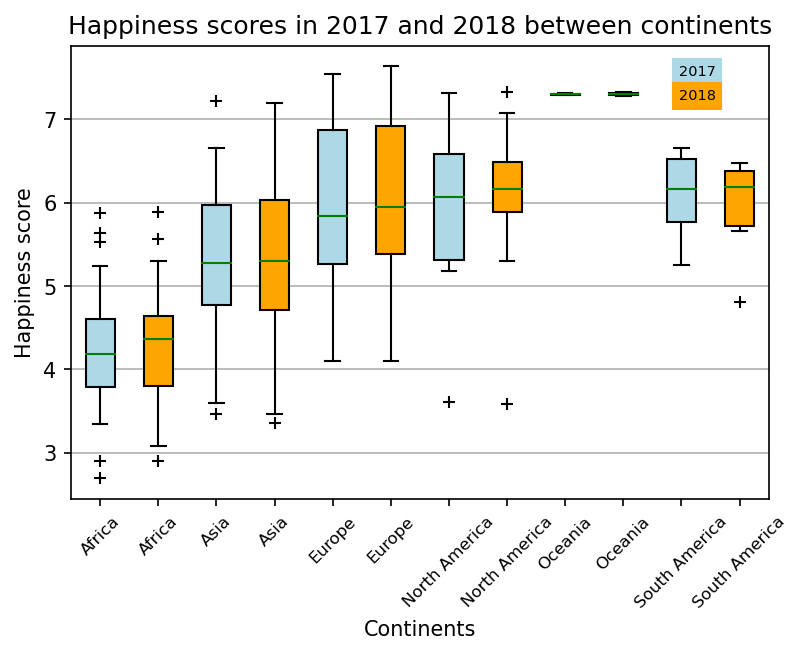

In [131]:
labels = ['Africa','Africa','Asia','Asia','Europe','Europe','North America','North America','Oceania','Oceania','South America','South America',]

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_ylabel('Happiness score')
ax.set_xlabel('Continents')
ax.set_title('Happiness scores in 2017 and 2018 between continents')
plt.xticks(rotation=45, fontsize=8)

df2017 = df_Final[df_Final['Year']=='2017']
df2018 = df_Final[df_Final['Year']=='2018']

data=[]

Africa2017 = df2017[df2017['Continent']=='Africa']
Asia2017 = df2017[df2017['Continent']=='Asia']
Europe2017 = df2017[df2017['Continent']=='Europe']
NorthAmerica2017 = df2017[df2017['Continent']=='North America']
Oceania2017 = df2017[df2017['Continent']=='Oceania']
SouthAmerica2017 = df2017[df2017['Continent']=='South America']
Africa2018 = df2018[df2018['Continent']=='Africa']
Asia2018 = df2018[df2018['Continent']=='Asia']
Europe2018 = df2018[df2018['Continent']=='Europe']
NorthAmerica2018 = df2018[df2018['Continent']=='North America']
Oceania2018 = df2018[df2018['Continent']=='Oceania']
SouthAmerica2018 = df2018[df2018['Continent']=='South America']

data.extend((Africa2017['Happiness score'],
             Africa2018['Happiness score'],
             Asia2017['Happiness score'],
             Asia2018['Happiness score'],
             Europe2017['Happiness score'],
             Europe2018['Happiness score'],
             NorthAmerica2017['Happiness score'],
             NorthAmerica2018['Happiness score'],
             Oceania2017['Happiness score'],
             Oceania2018['Happiness score'],
             SouthAmerica2017['Happiness score'],
             SouthAmerica2018['Happiness score']))

bp = ax.boxplot(data, notch=False, sym='+', vert=True, whis=1, patch_artist=True, labels=labels)

#Gridline
ax.yaxis.grid(True)

#Colour
colours=['lightblue','orange','lightblue','orange','lightblue','orange','lightblue','orange','lightblue','orange','lightblue','orange']
for patch, color in zip(bp['boxes'], colours):
        patch.set_facecolor(color)
for median in bp['medians']:
    median.set_color('green')
#Legend
fig.text(0.80, .83, f'2017',
         backgroundcolor=colours[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.79, f'2018',
         backgroundcolor=colours[1], color='black', weight='roman',
         size='x-small')

plt.show()


"minimum" = Q1-1.5IQR, "maximum" = Q1-1.5IQR. Oceania has a very tight boxplot both in 2017 and in 2018 as only Australia and New Zealand are in Oceania for the WHR, and both countries saw little difference in their scores between the years. North America saw a large decrease in their interquartile range, showing that North America was becoming more equal in their scores. Both Europe and Asia have a large spread of scores, as shown in their large interquartile range. Europe has a particularly large spread of scores as there "minimum" is less than North America (excluding outliers), Oceania and South America whilst their "maximum" is greater these continents. Africa in both years is very far below in all measurements for the happiness score when compared to other continents. South America also saw a convergence of their "minimum" and "maximum" values, suggesting the worst countries in South America improved, whilst the top countries remained relatively stagnant. 

<AxesSubplot:>

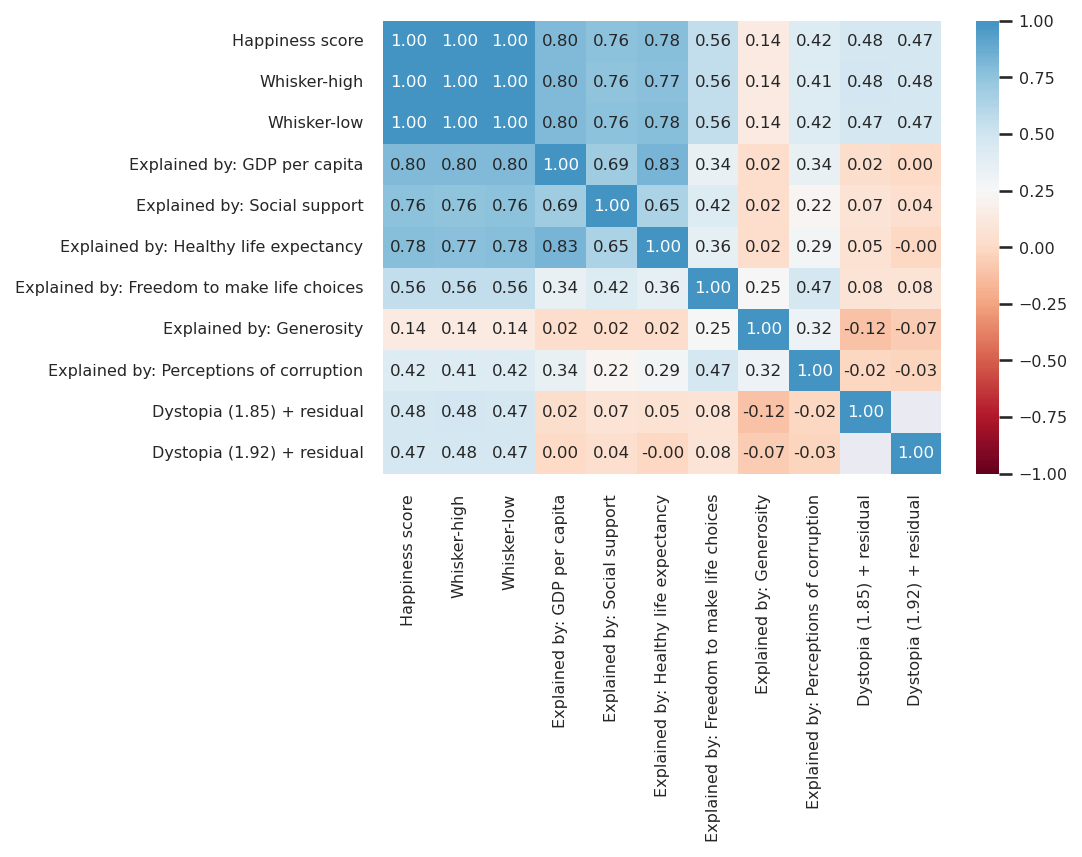

In [247]:
#Correlation matrix 
plt.figure(figsize=(6, 4))
sns.set(font_scale=.7)
sns.heatmap(df_Final.corr(method='pearson'), vmin=-1, vmax=1, center=0.25, cmap="RdBu", annot=True,annot_kws={"size": 8},fmt=".2f")

#Pairplot
#sns.pairplot(df_Final, hue='Continent')

What is the relationship between the factors in the world happiness report?

The method used to determine the correlation efficients was the Pearson method as the Pearson correlation coefficient is a statistic that is best used to measure the linear correlation between two variables X and Y which suits this dataframe as opposed to the Sperman method.

It is clear to see from the correlation matrix above that the factors influencing the happiness score the most are GDP per capita at 0.80, social support 0.76 and healthy life expectancy at 0.78. GDP per capita having the largest effect on the world happiness score suggests a westernized view. Genorosity is by far the lowest contributing factor towards the happiness score at 0.14 indicating that genoristy has almost no effect on happiness with a country. Both freedom to make life choices and perception of corruption have a significant effect on happiness at 0.56 and 0.42 respectively.

Perceptions of corruption has a relatively high correlation with freedom to make life choices suggesting that an decrease in freedom and an increase in corruption go hand in hand. Generosity not only has very little correlation with the happiness score, but also the other factors, suggesting that genorisity is likely to be attached to cultural practices rather than any economic factors. Healthy life expectancy is very highly correlated with GDP per capita, implying wealthier countries have much higher standards of healthcare due to the ability to spend more on it.